## Projeto Final do Módulo de Técnicas de Programação I
#### Descrição:
    Análise Exploratória de Dados de Vendas Online
### Regras:
- Aplicar o conhecimento de Numpy, Pandas e Git vistos em aula

#### Grupo composto por:
- Rayssa Vilaça



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clientes = pd.read_csv('assets/olist_customers_dataset.csv')
geolocalizacao = pd.read_csv('assets/olist_geolocation_dataset.csv')
pedido_itens = pd.read_csv('assets/olist_order_items_dataset.csv')
pedido_pagamentos = pd.read_csv('assets/olist_order_payments_dataset.csv')
pedido_avaliacoes = pd.read_csv('assets/olist_order_reviews_dataset.csv')
pedidos = pd.read_csv('assets/olist_orders_dataset.csv')
produtos = pd.read_csv('assets/olist_products_dataset.csv')
vendedores = pd.read_csv('assets/olist_sellers_dataset.csv')
traducao_nome_categoria_produto = pd.read_csv('assets/product_category_name_translation.csv')

### Análise Exploratória Inicial das Tabelas

#### Clientes

In [3]:
# Primeiramente, ver o conteúdo da tabela
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
print(f'A tabela clientes possui {clientes.shape[0]} linhas e {clientes.shape[1]} colunas')

A tabela clientes possui 99441 linhas e 5 colunas


In [5]:
# Ver o nome e o tipo de dados de cada coluna e verificar se há dados nulos ou faltantes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
# Outra forma de verificar os dados faltantes
clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
# Verificar a frequencia para as colunas categóricas cidade e estado
frequencia_clientes_por_cidade = clientes.value_counts('customer_city')
frequencia_clientes_por_estado = clientes.value_counts('customer_state')

print(frequencia_clientes_por_cidade, frequencia_clientes_por_estado, sep="\n-\n")

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: count, Length: 4119, dtype: int64
-
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


<Axes: title={'center': 'As Cinco Cidades com mais Clientes'}, xlabel='Cidades Brasileiras', ylabel='Número de Clientes'>

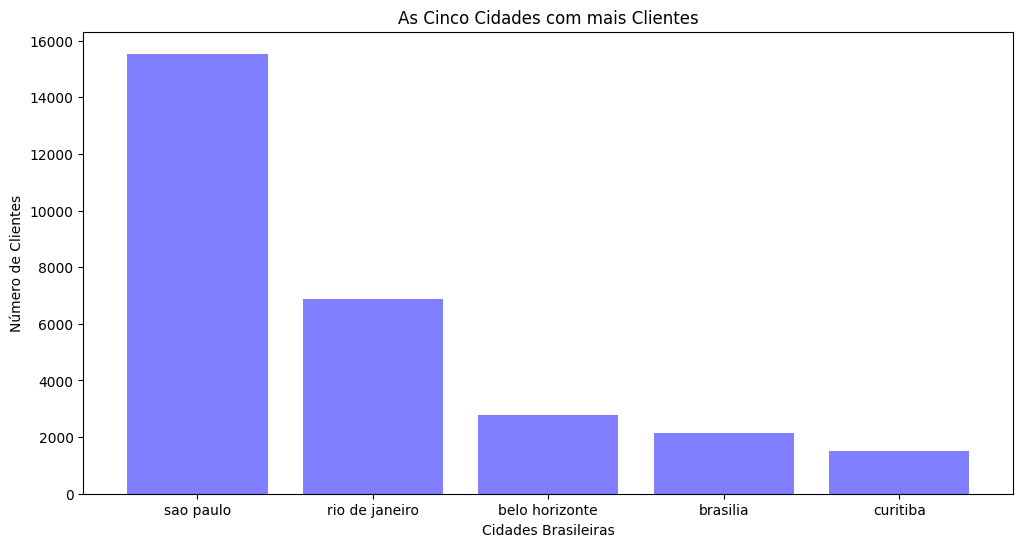

In [8]:
frequencia_clientes_por_cidade.nlargest(5).plot(kind='bar',
                                                title='As Cinco Cidades com mais Clientes',
                                                xlabel='Cidades Brasileiras',
                                                ylabel='Número de Clientes',
                                                rot=0,
                                                width=0.8,
                                                color='blue',
                                                alpha=0.5,
                                                figsize=(12, 6)
                                                )

<Axes: title={'center': 'Os Cinco Estados com mais Clientes'}, xlabel='Estados Brasileiros', ylabel='Número de Clientes'>

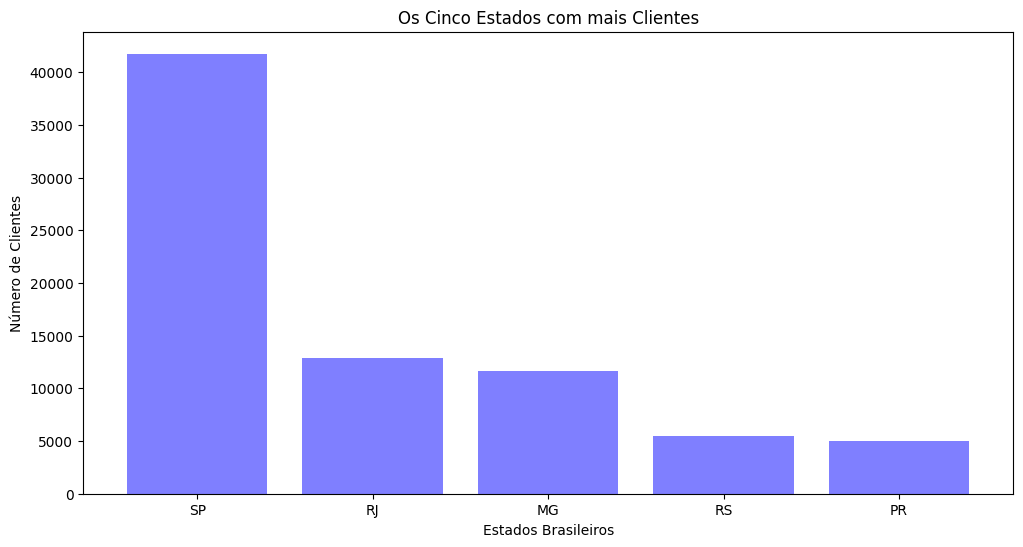

In [9]:
frequencia_clientes_por_estado.nlargest(5).plot(kind='bar',
                                                title='Os Cinco Estados com mais Clientes',
                                                xlabel='Estados Brasileiros',
                                                ylabel='Número de Clientes',
                                                rot=0,
                                                width=0.8,
                                                color='blue',
                                                alpha=0.5,
                                                figsize=(12, 6)
                                                )

#### Geolocalizacao

In [10]:
geolocalizacao.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
print(f'A tabela geolocalizacao possui {geolocalizacao.shape[0]} linhas e {geolocalizacao.shape[1]} colunas')

A tabela geolocalizacao possui 1000163 linhas e 5 colunas


In [12]:
geolocalizacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
geolocalizacao.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### Itens do Pedido

In [14]:
pedido_itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
print(f'A tabela pedido_itens possui {pedido_itens.shape[0]} linhas e {pedido_itens.shape[1]} colunas')

A tabela pedido_itens possui 112650 linhas e 7 colunas


In [16]:
pedido_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
pedido_itens.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [18]:
# Resumo estatístico das colunas price e freight_value
pedido_itens[['price', 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [19]:
print(f"A coluna preço possui média de {pedido_itens['price'].mean():.2f}, mediana de {pedido_itens['price'].median():.2f}, moda de {pedido_itens['price'].mode()[0]:.2f}, valor mínimo de {pedido_itens['price'].min():.2f}, valor máximo de {pedido_itens['price'].max():.2f} e desvio padrão de {pedido_itens['price'].std():.2f}")
print(f"A coluna valor do frete possui média de {pedido_itens['freight_value'].mean():.2f}, mediana de {pedido_itens['freight_value'].median():.2f}, moda de {pedido_itens['freight_value'].mode()[0]:.2f}, valor mínimo de {pedido_itens['freight_value'].min():.2f}, valor máximo de {pedido_itens['freight_value'].max():.2f} e desvio padrão de {pedido_itens['freight_value'].std():.2f}")

A coluna preço possui média de 120.65, mediana de 74.99, moda de 59.90, valor mínimo de 0.85, valor máximo de 6735.00 e desvio padrão de 183.63
A coluna valor do frete possui média de 19.99, mediana de 16.26, moda de 15.10, valor mínimo de 0.00, valor máximo de 409.68 e desvio padrão de 15.81


#### Formas de pagamento

In [20]:
pedido_pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [21]:
print(f'A tabela pedido_pagamentos possui {pedido_pagamentos.shape[0]} linhas e {pedido_pagamentos.shape[1]} colunas')

A tabela pedido_pagamentos possui 103886 linhas e 5 colunas


In [22]:
pedido_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [23]:
pedido_pagamentos.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [24]:
frequencia_forma_pagamento = pedido_pagamentos.value_counts('payment_type')
frequencia_forma_pagamento

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

<Axes: title={'center': 'Quantidade de Pedidos por Método de Pagamento'}, xlabel='Formas de Pagamento', ylabel='Número de Pedidos'>

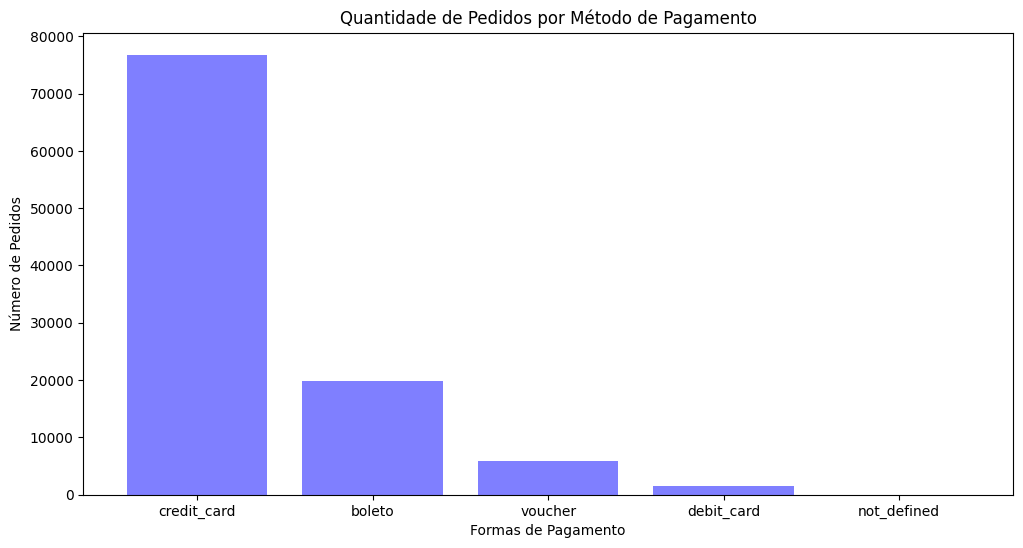

In [25]:
frequencia_forma_pagamento.plot(kind='bar',
                                title='Quantidade de Pedidos por Método de Pagamento',
                                xlabel='Formas de Pagamento',
                                ylabel='Número de Pedidos',
                                rot=0,
                                width=0.8,
                                color='blue',
                                alpha=0.5,
                                figsize=(12, 6)
                                )

In [26]:
pedido_pagamentos[['payment_installments', 'payment_value']].describe()

,payment_installments,payment_value
count,103886.000000,103886.000000
mean,2.853349,154.100380
std,2.687051,217.494064
min,0.000000,0.000000
25%,1.000000,56.790000
50%,1.000000,100.000000
75%,4.000000,171.837500
max,24.000000,13664.080000


In [27]:
print(f"A coluna parcelamento do pagamento possui média de {pedido_pagamentos['payment_installments'].mean():.2f}, mediana de {pedido_pagamentos['payment_installments'].median():.2f}, moda de {pedido_pagamentos['payment_installments'].mode()[0]:.2f}, valor mínimo de {pedido_pagamentos['payment_installments'].min():.2f}, valor máximo de {pedido_pagamentos['payment_installments'].max():.2f} e desvio padrão de {pedido_pagamentos['payment_installments'].std():.2f}")
print(f"A coluna valor do pagamento possui média de {pedido_pagamentos['payment_value'].mean():.2f}, mediana de {pedido_pagamentos['payment_value'].median():.2f}, moda de {pedido_pagamentos['payment_value'].mode()[0]:.2f}, valor mínimo de {pedido_pagamentos['payment_value'].min():.2f}, valor máximo de {pedido_pagamentos['payment_value'].max():.2f} e desvio padrão de {pedido_pagamentos['payment_value'].std():.2f}")

A coluna parcelamento do pagamento possui média de 2.85, mediana de 1.00, moda de 1.00, valor mínimo de 0.00, valor máximo de 24.00 e desvio padrão de 2.69
A coluna valor do pagamento possui média de 154.10, mediana de 100.00, moda de 50.00, valor mínimo de 0.00, valor máximo de 13664.08 e desvio padrão de 217.49


#### Avaliação do Pedido

In [28]:
pedido_avaliacoes.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [29]:
print(f'A tabela pedido_avaliacoes possui {pedido_avaliacoes.shape[0]} linhas e {pedido_avaliacoes.shape[1]} colunas')

A tabela pedido_avaliacoes possui 99224 linhas e 7 colunas


In [30]:
pedido_avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
"""
Verificamos que há dados faltantes nas colunas review_comment_title e review_comment_message
Normalmente esses campos são opcionais quando um usuário realiza a avaliação de uma compra em um e-commerce
"""
pedido_avaliacoes.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [32]:
"""
O número de ordem_id únicos na tabela pedidos_avaliacoes é menor que o número total de registros.
Isso indica que, em alguns casos, houve mais de uma avaliação para o mesmo pedido. Na aba discussões do Kaggle,
observei que há perguntas a respeito, mas todas sem respostas. Desta forma, por não saber se há um erro no dataset
ou se há lógica por trás, optei por considerar todas as avaliações mesmo que repetidas
"""
pedido_avaliacoes['order_id'].unique().shape[0]

98673

In [33]:
frequencia_avaliacao_nota = pedido_avaliacoes.value_counts('review_score').sort_index()
frequencia_avaliacao_nota

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

In [34]:
frequencia_avaliacao_nota = frequencia_avaliacao_nota.reset_index()
frequencia_avaliacao_nota

,review_score,count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [35]:
# Criar labels para representar o nível de satisfação baseado nas notas dadas para cada pedido
labels = {1: 'Muito Ruim',
          2: 'Ruim',
          3: 'Normal',
          4: 'Bom',
          5: 'Muito Bom'}

frequencia_avaliacao_nota['review_score'] = frequencia_avaliacao_nota['review_score'].map(labels)
frequencia_avaliacao_nota

,review_score,count
0,Muito Ruim,11424
1,Ruim,3151
2,Normal,8179
3,Bom,19142
4,Muito Bom,57328


In [36]:
frequencia_avaliacao_nota.set_index('review_score', inplace=True)
frequencia_avaliacao_nota

,count
review_score,
Muito Ruim,11424
Ruim,3151
Normal,8179
Bom,19142
Muito Bom,57328


In [37]:
# Outra forma de renomear os índices com o mapeamento em labels
# frequencia_avaliacao_nota.index = frequencia_avaliacao_nota.index.map(labels)
# frequencia_avaliacao_nota

<Axes: title={'center': 'Frequência da Avaliação dos Pedidos'}, xlabel='Avaliação', ylabel='Número de Pedidos'>

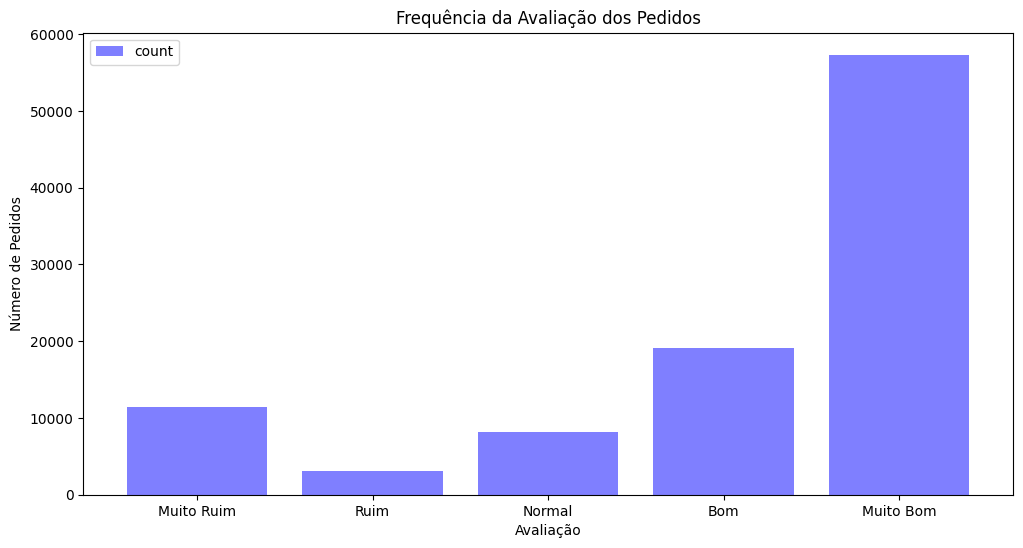

In [38]:
frequencia_avaliacao_nota.plot(kind='bar',
                                title='Frequência da Avaliação dos Pedidos',
                                xlabel='Avaliação',
                                ylabel='Número de Pedidos',
                                rot=0,
                                width=0.8,
                                color='blue',
                                alpha=0.5,
                                figsize=(12, 6)
                                )

#### Pedidos

In [39]:
pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
print(f'A tabela orders possui {pedidos.shape[0]} linhas e {pedidos.shape[1]} colunas')

A tabela orders possui 99441 linhas e 8 colunas


In [41]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [42]:
pedidos.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [43]:
"""
O status do pedido pode trazer informações interessantes que podem explicar o motivo de parte
dos valores nulos
""" 
pedidos_com_valores_nulos = pedidos.loc[pedidos['order_approved_at'].isnull()]
pedidos_com_valores_nulos.value_counts('order_status')

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [44]:
pedidos_com_valores_nulos = pedidos.loc[pedidos['order_delivered_carrier_date'].isnull()]
pedidos_com_valores_nulos.value_counts('order_status')

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [45]:
pedidos_com_valores_nulos = pedidos.loc[pedidos['order_delivered_customer_date'].isnull()]
pedidos_com_valores_nulos.value_counts('order_status')

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [46]:
frequencia_status_pedido = pedidos.value_counts('order_status')
frequencia_status_pedido

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

<Axes: title={'center': 'Frequência dos Status do Pedido'}, xlabel='Status do Pedido', ylabel='Número de Pedidos'>

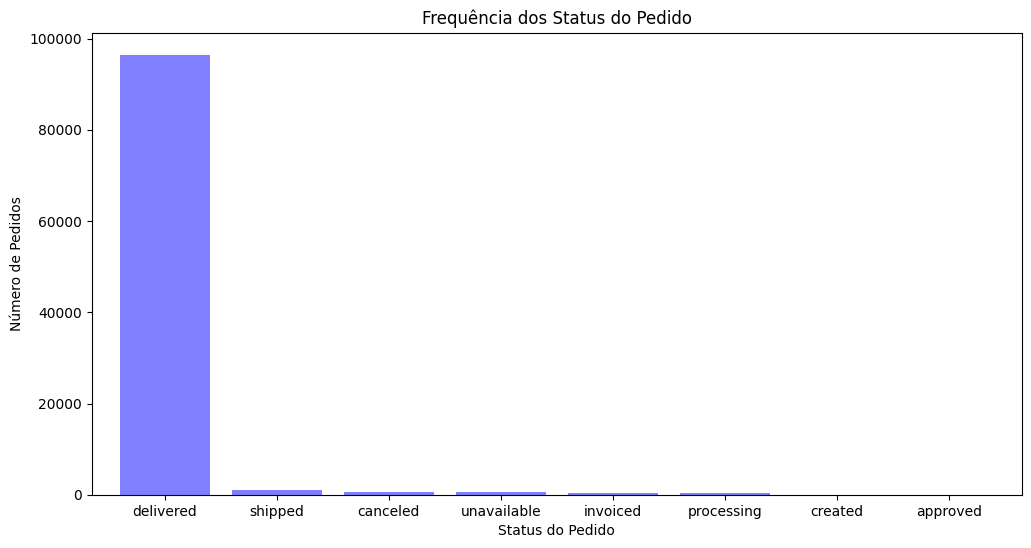

In [47]:
frequencia_status_pedido.plot(kind='bar',
                                title='Frequência dos Status do Pedido',
                                xlabel='Status do Pedido',
                                ylabel='Número de Pedidos',
                                rot=0,
                                width=0.8,
                                color='blue',
                                alpha=0.5,
                                figsize=(12, 6)
                                )